# Feature Selection
* Feature Selection is the process where we automatically or manually select those features which contribute most to our prediction variable or output in which we are interested in.

* Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features

## Feature Selection Methods:

* Filter methods
* Wrapper methods
* Embedded Methods

### - Filter methods:

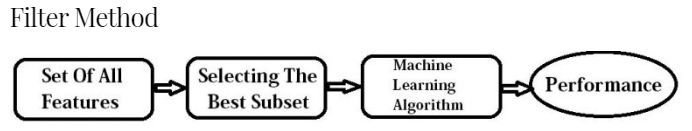

* These are generally used as a preprocessing step.
* The selection of features is independent of any machine learning algorithms.
* Here, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.
* We can use these methods here:

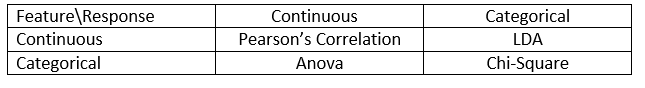


### - Wrapper methods:

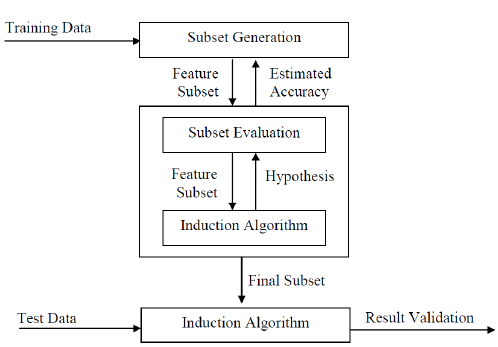

* Here, we try to use a subset of features and train a model using them.
* Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset.
* The problem is essentially reduced to a search problem.
* These methods are usually computationally very expensive.
* Some common examples of wrapper methods are forward feature selection, backward feature elimination, recursive feature elimination, etc.
* These type of techinques we only use when dataset is very small.

**Forward Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

**Backward Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

**Recursive Feature elimination**: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.


### - Embedded methods:

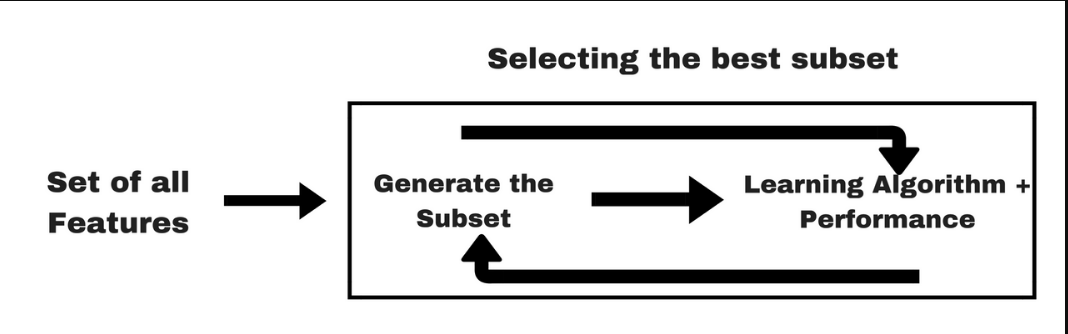

* These methods combine the qualities of filter and wrapper methods.
* It’s implemented by algorithms that have their own built-in feature selection methods.
* Here we select different permutation and combinations of possible subset and these are given to model one by one, whichever subset has more accuracy that one is selected as final.
* Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.


#### The main differences between the filter and wrapper methods for feature selection are:
* Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
* Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
* Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
* Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.
 


## 3 basic techniques which are highly used in Feature Selection:

### 1. Univariate Selection
* Statistical tests can be used to select those features that have the strongest relationship with the output variable.
* The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features. If K=5, it will find best 5 attributes with respect to the output from the dataset.
* The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
# Mobile Price Classification Dataset
df = pd.read_csv("data/1train.csv")
df.sample(5)
# `price_range` columns: Target variable with a value of:
# 0(low cost mobile), 1(medium cost mobile), 2(high cost mobile) and 3(very high cost mobile)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
559,1191,0,2.4,1,2,0,13,0.9,169,1,...,179,1813,1028,14,6,8,1,1,1,0
1794,1494,0,1.9,0,2,1,47,0.4,129,2,...,207,1177,3202,13,1,14,1,0,0,3
329,972,1,0.5,1,5,0,13,0.4,193,5,...,1392,1795,1615,11,6,13,0,1,0,1
1807,713,0,1.4,1,4,0,53,0.8,98,1,...,123,1477,1462,19,18,13,1,0,1,0
398,1323,1,2.5,1,10,1,28,0.2,131,4,...,162,619,1892,10,0,15,1,1,1,1


In [5]:
# Separating features and target variable
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [6]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

In [7]:
# Now we get scores
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)

In [8]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfColumns, dfScores], axis=1)
# Naming the dataframe columns
featureScores.columns = ['Specs', 'Score']
# Highest the score, more important the feature is
featureScores

,Specs,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [9]:
# Print top 10 best features
print(featureScores.nlargest(10,'Score'))

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### 2. Feature Importance:
- We can get the feature importance of each feature of our dataset by using the feature importance property of the model.
- Feature importance gives you a score for each feature of our data, the higher the score more important or relevant is the feature towards our output variable.
- Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [11]:
# Use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

[0.06035571 0.02062184 0.03429196 0.02007493 0.03275985 0.01730798
 0.03652164 0.03415193 0.0362432  0.03385967 0.03504137 0.04631098
 0.04813689 0.38547222 0.03571316 0.03477853 0.03640638 0.01474226
 0.01669244 0.02051705]


<AxesSubplot:>

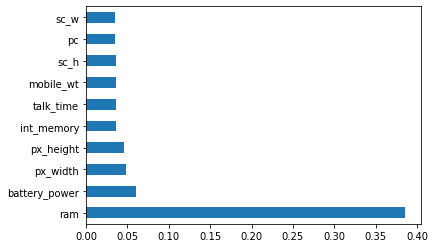

In [12]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# Here also we can see RAM has highest value

### 3. Correlation Matrix with Heatmap
- Correlation states how the features are related to each other or the target variable.
- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

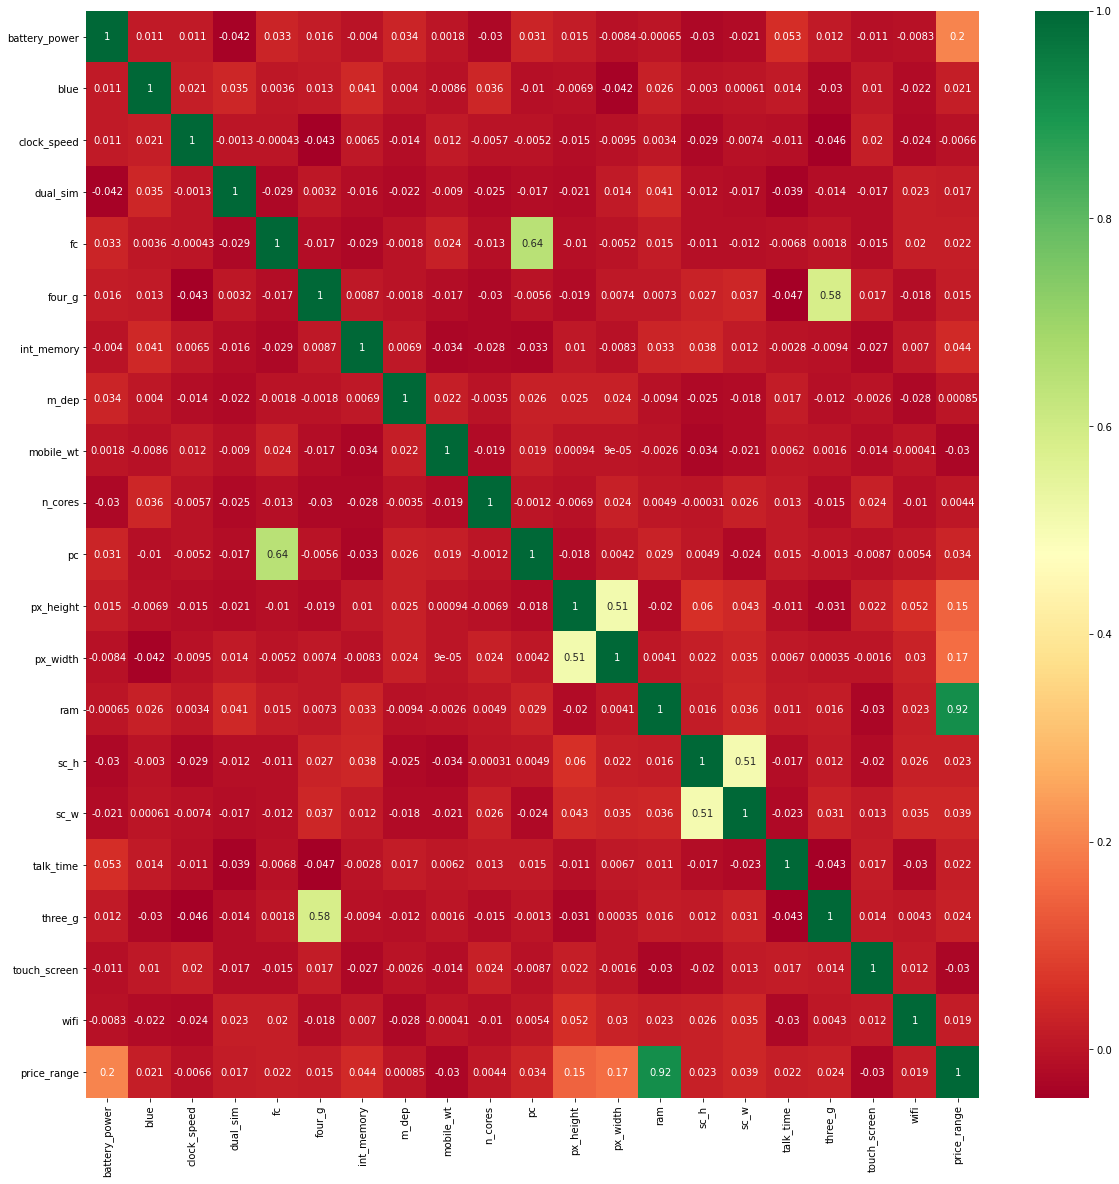

In [13]:
import seaborn as sns
# Get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
# Plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [14]:
# Here in last row we can RAM we can see price_range and RAM are highly correlated
# Also battery_power is somewhat correlated,
# So from this correlation heatmap we can assume all those features which have
# correlation  > 0.2